In [57]:
# Imports
from pathlib import Path
import pandas as pd
import tarfile
import requests
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt


In [58]:
def load_housing_data():
  tar_path = Path("datasets/housing.tgz")

  if not tar_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"

    # download .tgz
    response = requests.get(url)
    assert response.status_code == 200, "failed to download the data file"
    with open(tar_path, "wb") as file:
      file.write(response.content)

    # extract .tgz
    with tarfile.open(tar_path) as file:
      file.extractall(Path("datasets"))

  # read as DataFrame
  return pd.read_csv(Path("datasets/housing/housing.csv"));

In [59]:
housing = load_housing_data()
pd.set_option('display.width', 1000)

print(housing[:5])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY


In [60]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [61]:
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [62]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  total_bedrooms    population    households  median_income  median_house_value
count  20640.000000  20640.000000        20640.000000  20640.000000    20433.000000  20640.000000  20640.000000   20640.000000        20640.000000
mean    -119.569704     35.631861           28.639486   2635.763081      537.870553   1425.476744    499.539680       3.870671       206855.816909
std        2.003532      2.135952           12.585558   2181.615252      421.385070   1132.462122    382.329753       1.899822       115395.615874
min     -124.350000     32.540000            1.000000      2.000000        1.000000      3.000000      1.000000       0.499900        14999.000000
25%     -121.800000     33.930000           18.000000   1447.750000      296.000000    787.000000    280.000000       2.563400       119600.000000
50%     -118.490000     34.260000           29.000000   2127.000000      435.000000   1166.000000    409.000000       

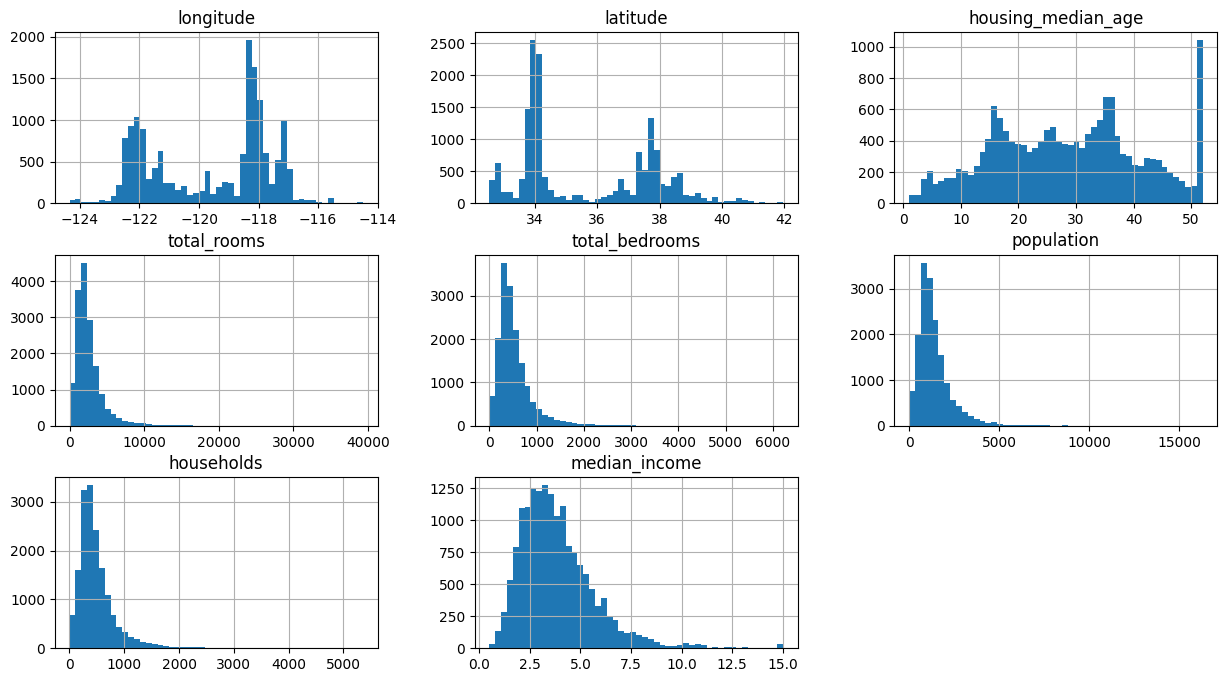

In [95]:
housing.hist(bins=50, figsize=(15, 8))
plt.show()

Total: 20640, Training: 16512, Test: 4128


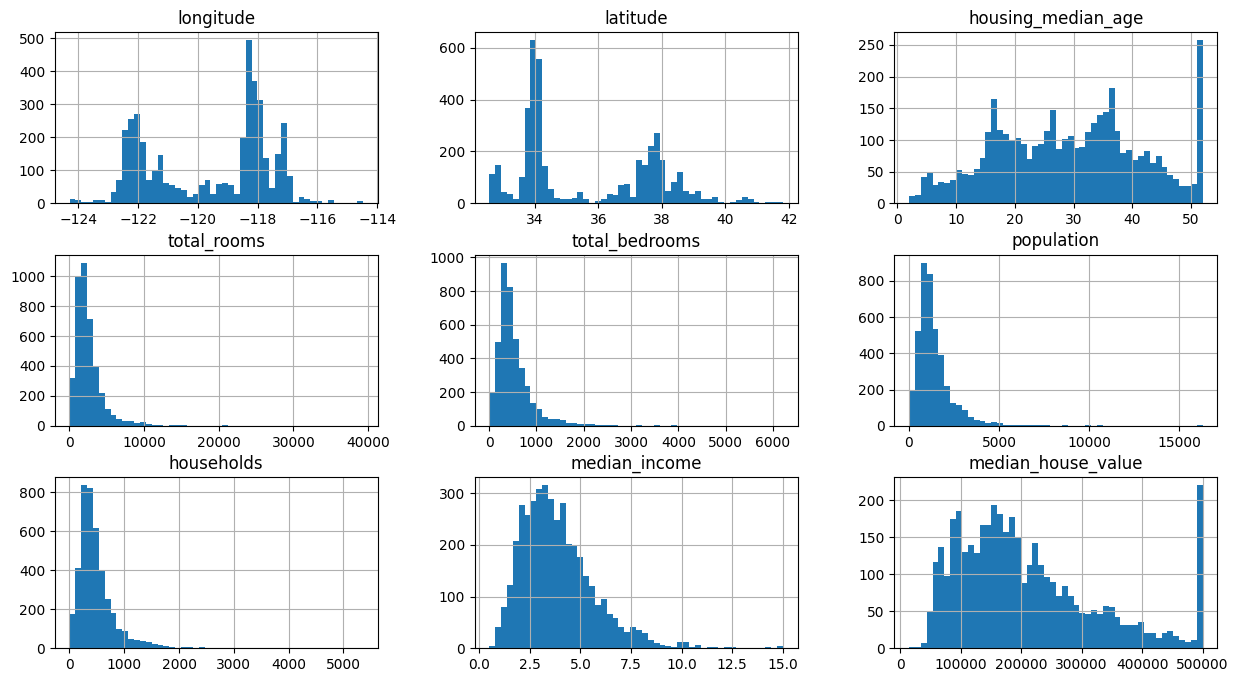

In [64]:
def shuffle_and_split_data(data : pd.DataFrame, test_data_ratio) -> Tuple[pd.DataFrame, pd.DataFrame]:
  np.random.seed(42)
  shuffled_indexes = np.random.permutation(len(data))   # array of shuffled/permuted indexes
  test_size = int(len(data) * test_data_ratio)
  test_indexes = shuffled_indexes[:test_size]
  train_indexes = shuffled_indexes[test_size:]

  return data.iloc[train_indexes], data.iloc[test_indexes]

#train_set, test_set = shuffle_and_split_data(housing, 0.2)


# using sk-learn
from sklearn.model_selection import train_test_split

# random split/sampling
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Total: {len(housing)}, Training: {len(train_set)}, Test: {len(test_set)}")
test_set.hist(bins=50, figsize=(15, 8))
plt.show()


In [65]:
# Random Sampling: (see how category proportions has changes)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Population: Income Category Proportion")
print(housing["income_cat"].value_counts() / len(housing))

print(f"Population: Income Category Proportion")
print(test_set["income_cat"].value_counts() / len(test_set))

Population: Income Category Proportion
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Population: Income Category Proportion
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: income_cat, dtype: float64


In [66]:
# Stratified Sampling: Since median_income is skewed, we need stratified sampling (see how proportions are almost identical)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

print(f"Population: Income Category Proportion")
print(housing["income_cat"].value_counts() / len(housing))

print(f"Population: Income Category Proportion")
print(test_set["income_cat"].value_counts() / len(test_set))

Population: Income Category Proportion
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Population: Income Category Proportion
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [67]:
# ok, enough income_category, drop it
for set_ in (train_set, test_set):
  set_.drop("income_cat", axis=1, inplace=True)

housing = train_set.copy()

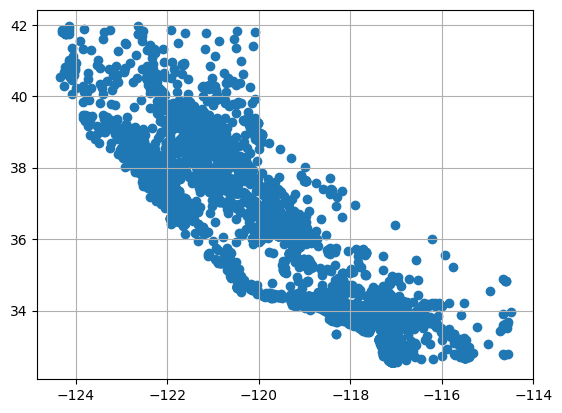

In [68]:
plt.scatter(x=housing["longitude"], y=housing["latitude"])
plt.grid()
plt.show()

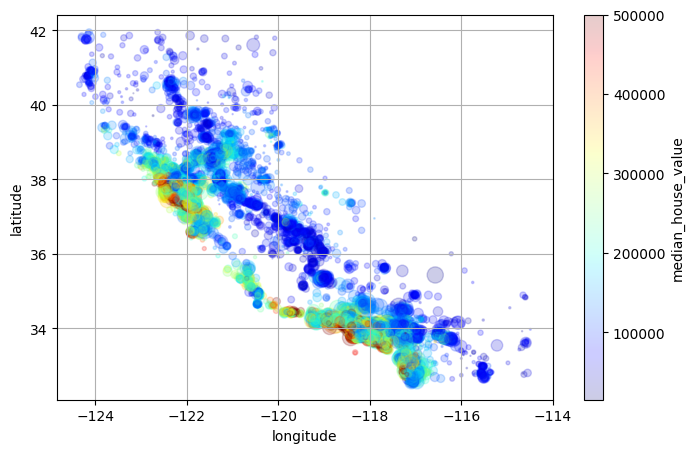

In [69]:
# We couldn't know the dense areas from the prev plot
# Set alpha (opacity) to 0.2 so when multiple points plot on top of each other, it appears darker
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2,
             c="median_house_value", cmap="jet", colorbar=True,
             s=housing["population"] / 50,    # size of points correlates to the density
             legend=True, figsize=(8, 5))
plt.show()

In [70]:
# Correlation
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# Median Income -> has the most influence
# Latitude -> The more you go up, the cheaper houses are.
# Notice: "ocean_proximity" feature is not here, and never will. We got a warning too, only numeric features can have correlation value.

<ipython-input-70-4c4efe768485>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [71]:
# Feature Engineering
housing["_rooms_per_house"]= housing["total_rooms"] / housing["households"]
housing["_bedrooms_ratio"]= housing["total_bedrooms"] / housing["total_rooms"]
housing["_people_per_house"]= housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


<ipython-input-71-8a7948583c61>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
_rooms_per_house      0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
_people_per_house    -0.038224
longitude            -0.050859
latitude             -0.139584
_bedrooms_ratio      -0.256397
Name: median_house_value, dtype: float64

In [72]:
# Prep the data
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()
housing.info()

# Notice, total bedrooms has missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [73]:
# Replace total_bedrooms missing values with the median of the feature
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Imputer works on numberic features only, set ocean_proximity aside for now
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)
X = imputer.transform(housing_num) # handled by sklearn -> returned as 2D array -> convert it to DF
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

# Note: no missing values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [76]:
# # [Option-1] Ocean proximity -> OneHot Encoding
# housing_cat = housing[["ocean_proximity"]]

# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# housing_cat_hot = cat_encoder.fit_transform(housing_cat)

# print(cat_encoder.categories_)
#print(housing_cat_hot)
#print(housing_cat_hot.toarray())

In [75]:
# [Option-2] ocean_proximity -> category using pd.get_dummies(..)
pd.get_dummies(housing_cat)


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0,0,0,1,0
14973,1,0,0,0,0
3785,0,1,0,0,0
14689,0,1,0,0,0
20507,0,0,0,0,1
...,...,...,...,...,...
14207,1,0,0,0,0
13105,0,1,0,0,0
19301,0,0,0,0,1
19121,1,0,0,0,0


In [77]:
# Explore Preprocessing: get_dummies /sparse matrix
test_df = pd.DataFrame({"ocean_proximity" : ["INLAND", "NEAR BAY", "INLAND", "NEAR BAY", "INLAND", "NEAR BA"]})
pd.get_dummies(test_df)

,ocean_proximity_INLAND,ocean_proximity_NEAR BA,ocean_proximity_NEAR BAY
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [78]:
# Sklearn-Pipeline: Combine Encoder/Imputer in a pipeline
#   OrdinalEncoder: Categories -> 0, 1, 2, 3, ..etc

import sklearn.preprocessing as preprocessing
import sklearn.impute as impute
import sklearn.compose as compose
from sklearn.pipeline import Pipeline

transformers = [
    ("encoder", preprocessing.OrdinalEncoder(), ["ocean_proximity"]),
    ("imputer", impute.SimpleImputer(strategy="mean"), ["total_bedrooms"])
]
column_transformer = compose.ColumnTransformer(transformers)

pipeline = Pipeline(steps=[
    ("transformers", column_transformer),
])
housing_tr = pipeline.fit_transform(housing)

print(housing_tr)
print("*" * 150)
print(housing_tr.info())
print("*" * 150)
print(housing_tr.describe())

       encoder__ocean_proximity  imputer__total_bedrooms
13096                       3.0                   1115.0
14973                       0.0                    354.0
3785                        1.0                    217.0
14689                       1.0                    851.0
20507                       4.0                   1211.0
...                         ...                      ...
14207                       0.0                    597.0
13105                       1.0                    592.0
19301                       4.0                    775.0
19121                       0.0                    873.0
19888                       4.0                    195.0

[16512 rows x 2 columns]
******************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 2 columns):
 #   Column                

In [86]:
scaler = preprocessing.StandardScaler()
housing_num_tr = scaler.fit_transform(housing_num)
housing_num_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,2.108500e-17,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.269200e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.731971e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.476096e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.502091e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.337988e+01,1.359152e+01,1.268893e+01,5.882868e+00


In [91]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
housing_num_tr = scaler.fit_transform(housing_num)
housing_num_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,0.484470,0.328484,0.540729,0.067079,0.086640,0.087260,0.093147,0.232447
std,0.202903,0.226946,0.246779,0.055580,0.068266,0.067157,0.071470,0.130477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258621,0.146809,0.333333,0.036752,0.047512,0.048092,0.051895,0.142246
50%,0.592292,0.181915,0.549020,0.053996,0.069737,0.071402,0.075975,0.209556
75%,0.643002,0.550000,0.705882,0.080167,0.103720,0.105693,0.112376,0.293106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
import sklearn
from sklearn.pipeline import Pipeline
import sklearn.impute as impute
import sklearn.preprocessing as preprocessing
import sklearn.compose as compose

sklearn.set_config(transform_output="default")

num_pipeline = Pipeline(steps=[
    ("Imputer", impute.SimpleImputer(strategy="median") ),
    ("Scaler", preprocessing.StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("Imputer", impute.SimpleImputer(strategy="most_frequent")),
    ("Encoder", preprocessing.OneHotEncoder(handle_unknown="ignore"))
])

dataset_transformer = compose.ColumnTransformer([
    ("num", num_pipeline, compose.make_column_selector(dtype_include=np.float64)),
    ("cat", cat_pipeline, compose.make_column_selector(dtype_include=object)),
])

housing_prepared = dataset_transformer.fit_transform(housing)
housing_prepared = pd.DataFrame(housing_prepared, columns=dataset_transformer.get_feature_names_out(), index=housing.index)
housing_prepared

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0
